In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# моковые данные для теста предикативной модели
dates = [
    "2020-03", "2022-03",  # Период 1
    "2022-03", "2022-10",  # Период 2
    "2022-10", "2023-04",  # Период 3
    "2023-04", "2024-02",  # Период 4
    "2024-02", "2024-09"   # Период 5
]
income = [
    0, 100000,       # Период 1
    100000, 164000,  # Период 2
    164000, 261000,  # Период 3
    261000, 326000,  # Период 4
    326000, 696000   # Период 5
]

# Конвертируем даты в формат `datetime`
dates = [datetime.strptime(date, "%Y-%m") for date in dates]

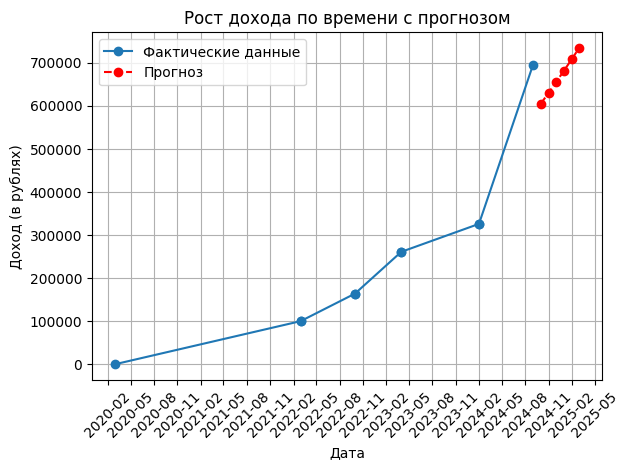

In [3]:
# Преобразуем даты в числа (например, учитывая дни с начала)
date_numbers = [(date - dates[0]).days for date in dates]

# Подготовка данных для полиномиальной регрессии
X = np.array(date_numbers).reshape(-1, 1)
y = np.array(income)

# Полином степени 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Обучаем модель
model = LinearRegression()
model.fit(X_poly, y)

# Прогноз на следующие 6 месяцев
future_dates = [dates[-1] + pd.DateOffset(months=i) for i in range(1, 7)]
future_date_numbers = [(date.to_pydatetime() - dates[0]).days for date in future_dates]
future_X_poly = poly.transform(np.array(future_date_numbers).reshape(-1, 1))

# Прогнозирование дохода
predicted_incomes = model.predict(future_X_poly)

# Обновляем даты и доходы для графика
all_dates = dates + [d.to_pydatetime() for d in future_dates]
all_incomes = list(income) + list(predicted_incomes)

# Построение обновленного графика
fig, ax = plt.subplots()
ax.plot(dates, income, marker='o', label='Фактические данные')
ax.plot(all_dates[-6:], predicted_incomes, marker='o', linestyle='dashed', color='red', label='Прогноз')

# Форматирование
ax.set_title("Рост дохода по времени с прогнозом")
ax.set_xlabel("Дата")
ax.set_ylabel("Доход (в рублях)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показать обновленный график
plt.show()